## Which major Seattle events seemed to have had an impact on Seattle's AirBNB Market?

In [1]:
from datetime import timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scripts.utility import *
from scripts.dates import (
    bumbershoot_dates,
    siff_dates,
    hempfest_dates,
    pride_dates,
    summer_dates,
    all_events,
)

# set data paths
raw_path = "data/raw/"
preproc_path = "data/intermediate/preproc/"
impact_path = "data/finished/"

%load_ext autoreload
%autoreload 2
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
# load data
calendar_df = pd.read_csv(preproc_path + "calendar.csv")
reviews_df = pd.read_csv(preproc_path + "reviews.csv")
location_df = pd.read_csv(preproc_path + "location.csv")

/Users/dmoton/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<IPython.core.display.Javascript object>

In [3]:
# calculate availability metrics by day/week/month
listings_byday_df = (
    calendar_df[calendar_df["available"] == "t"][["listing_id", "date"]]
    .groupby("date")
    .count()
)
listings_byweek_df = (
    calendar_df[calendar_df["available"] == "t"][["listing_id", "week"]]
    .groupby("week")
    .count()
)
listings_bymonth_df = (
    calendar_df[calendar_df["available"] == "t"][["listing_id", "month"]]
    .groupby("month")
    .count()
)

total_byday_df = calendar_df[["available", "date"]].groupby("date").count()
total_byweek_df = calendar_df[["available", "week"]].groupby("week").count()
total_bymonth_df = calendar_df[["available", "month"]].groupby("month").count()

availability_rate = dict()
availability_rate["day"] = listings_byday_df["listing_id"] / total_byday_df["available"]
availability_rate["week"] = (
    listings_byweek_df["listing_id"] / total_byweek_df["available"]
)
availability_rate["month"] = (
    listings_bymonth_df["listing_id"] / total_bymonth_df["available"]
)

availability_perc_change = dict()
availability_perc_change["week"] = availability_rate["week"].pct_change(periods=1)
availability_perc_change["month"] = availability_rate["month"].pct_change(periods=1)

<IPython.core.display.Javascript object>

In [4]:
# calculate the price metrics listing prices (by day/week/month)
price_time_mean = dict()
avail_df = calendar_df[calendar_df["available"] == "t"]
price_time_mean["day"] = avail_df[["price", "date"]].groupby("date").mean()
price_time_mean["week"] = avail_df[["price", "week"]].groupby("week").mean()
price_time_mean["month"] = avail_df[["price", "month"]].groupby("month").mean()

price_time_std = dict()
price_time_std["day"] = avail_df[["price", "date"]].groupby("date").std()
price_time_std["week"] = avail_df[["price", "week"]].groupby("week").std()
price_time_std["month"] = avail_df[["price", "month"]].groupby("month").std()

price_perc_change = dict()
price_perc_change["week"] = price_time_mean["week"].pct_change(periods=1)
price_perc_change["month"] = price_time_mean["month"].pct_change(periods=1)

<IPython.core.display.Javascript object>

In [5]:
# calculate review counts
review_counts = dict()
review_counts["week"] = reviews_df[["week", "listing_id"]].groupby("week").count()
review_counts["month"] = reviews_df[["month", "listing_id"]].groupby("month").count()
# get average review by week and month

<IPython.core.display.Javascript object>

/Users/dmoton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


<Figure size 432x288 with 0 Axes>

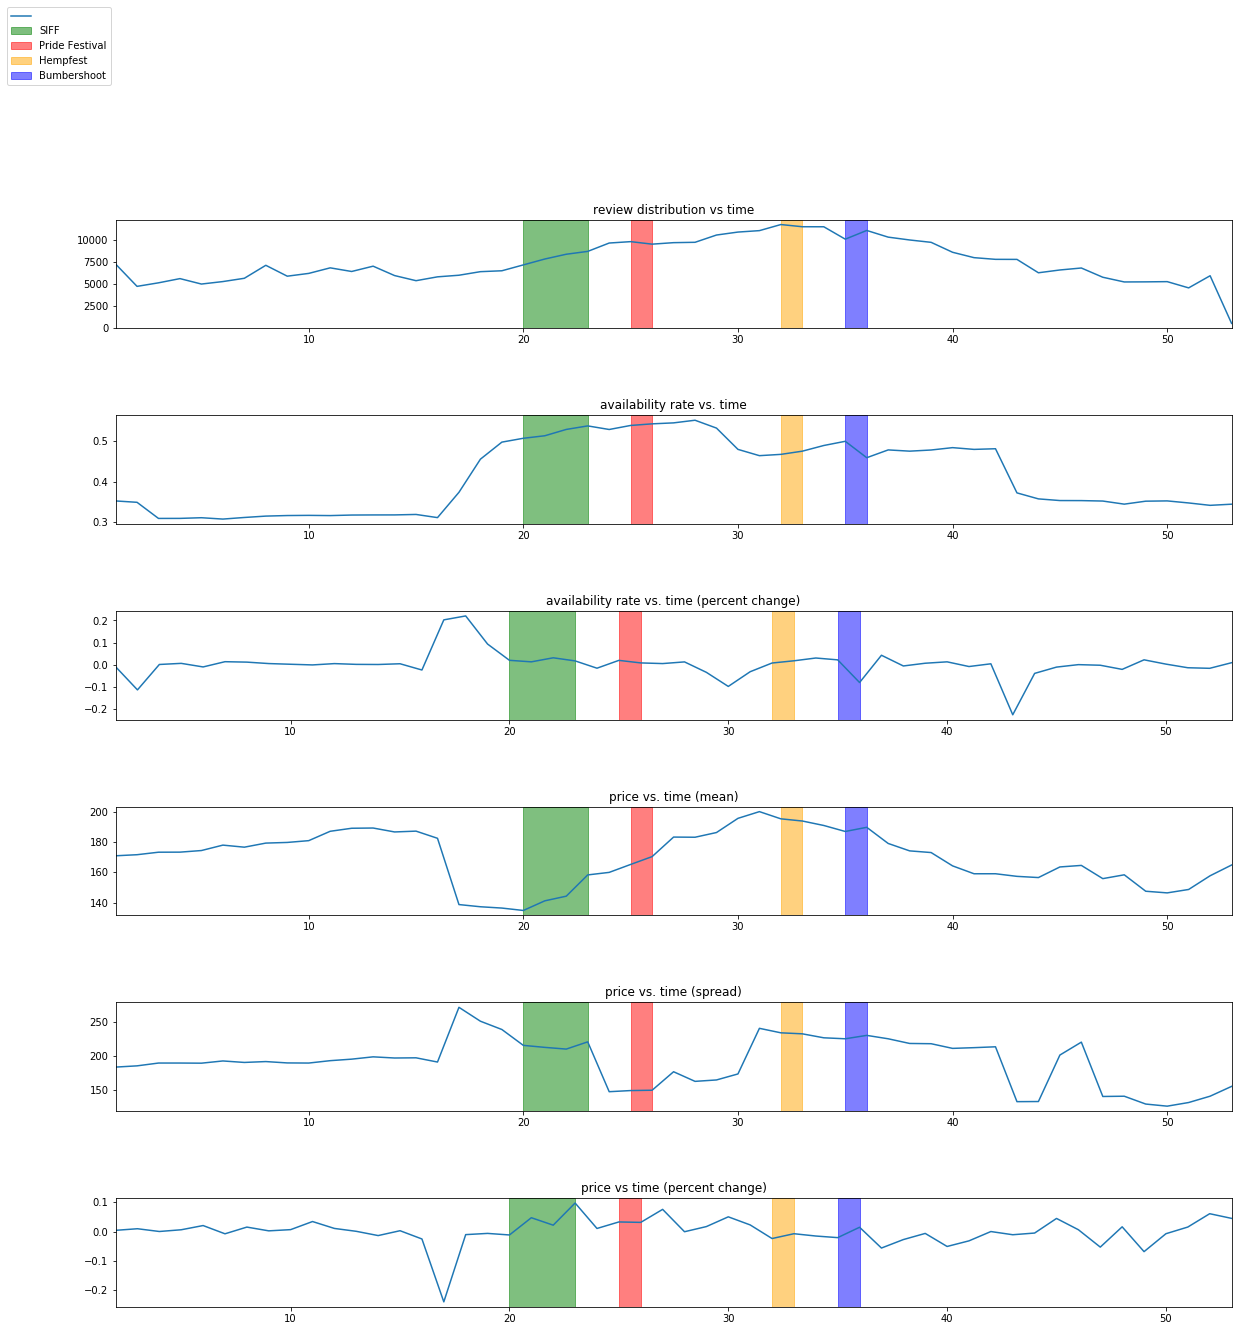

<IPython.core.display.Javascript object>

In [11]:
plt.clf()

fig, initial_plt = plt.subplots(6)

measures_tuple = (
    (review_counts["week"], "review distribution vs time"),
    (availability_rate["week"], "availability rate vs. time"),
    (availability_perc_change["week"], "availability rate vs. time (percent change)"),
    (price_time_mean["week"], "price vs. time (mean)"),
    (price_time_std["week"], "price vs. time (spread)"),
    (price_perc_change["week"], "price vs time (percent change)"),
)

# create initial plots from relevant measures
for index, plot in enumerate(initial_plt):
    initial_plt[index].plot(measures_tuple[index][0])
    initial_plt[index].set_title(measures_tuple[index][1])

for plot in initial_plt:
    plot.axvspan(
        siff_dates["week_start"], siff_dates["week_end"], color="green", alpha=0.5
    )
    plot.axvspan(
        pride_dates["week_start"], pride_dates["week_end"], color="red", alpha=0.5
    )
    plot.axvspan(
        hempfest_dates["week_start"],
        hempfest_dates["week_end"],
        color="orange",
        alpha=0.5,
    )
    plot.axvspan(
        bumbershoot_dates["week_start"],
        bumbershoot_dates["week_end"],
        color="blue",
        alpha=0.5,
    )
    plot.margins(x=0)

# Add legend at top left
plt.gcf().set_size_inches(20, 20)
plt.subplots_adjust(hspace=0.8)
plt.legend(
    initial_plt,
    labels=["", "SIFF", "Pride Festival", "Hempfest", "Bumbershoot"],
    loc="upper right",
    bbox_to_anchor=(0, 12),
)
plt.show()
fig.savefig(impact_path + "impact_byweek.jpg")

### Seattle International Film Festival (19 May - 12 June)
The SIFF is an international film festival taking place around Downtown Seattle. There is no meaningful increase in availability and only a modest increase in price. The historical review total steadily increases during the festival, which might suggest increased demand, but it's not really that distinct compared to the general increase in the Summer months.

Just over 70 pecent of attendees to SIFF come from the Seattle area, so that might explain why we don't really see a noticeable jump in attendance or review distribution that you might expect to see from travellers coming from out-of-town. 

- https://www.siff.net/Documents/DEVO/Sponsorship/DEV_sponsorshipdeck_2019.pdf

### Seattle Pride Festival (20 - 28 June)
The Seattle Pride festival is an annual celebration held towards the end of June by the local LGBT community. Seattle's Pride parade is the fourth largest such parade in the nation and Seattle was rated one of the best cities in the US for LGBT individuals in a NerdWallet study. Given this context, we might expect there to be a fair amount of travelers adding to the AirBnB demand during the weeklong event.

There is a steady increase in price for the listings during the Pride Festival, and the average price seems to plateau after the festival. We do see a sudden decline in availability during the week of the festival, but it's not accompanied by a historical increase in reviews in the following week.

- https://www.nerdwallet.com/blog/mortgages/top-lgbt-friendly-cities-2015/
- https://www.seattlepride.org/2019/04/29/2019-seattle-pride-to-honor-50th-anniversary-of-stonewall/

### Hempfest (14 - 18 August)
Hempfest began in Seattle in 1991 as the "Washington Hemp Expo" with Cannabis policy reform being the major thrust behind it. Since then, it has become the world's largest gathering advocating for the decrimininalization of marijuana; it typically brings in over 100,000 attendees during the three-day event.

The number of reviews is the only noticeable change I see in the data during Hempfest. However, it's difficult to determine how many of the reviews are actually related to Hempfest - a quick glance at some reviews don't offer much help:

In [ ]:
hf_reviews_df = reviews_df[
    (pd.to_datetime(reviews_df["date"]).dt.week >= hempfest_dates["week_start"])
    & (pd.to_datetime(reviews_df["date"]).dt.week <= hempfest_dates["week_end"] + 2)
]

In [ ]:
# collect some potentially hempfest-related reviews
search_for = ["festival", "Festival", "FESTIVAL", "hempfest", "HEMPFEST", "Hempfest"]
hempfest_reviews = hf_reviews_df[
    hf_reviews_df["comments"].str.contains("|".join(search_for)) == True
]["comments"]

hempfest_reviews

In [ ]:
hempfest_reviews.count() / hf_reviews_df["comments"].count()

A possible reason for the lack of visible impact on the AirBnB market may relate to the fact that Hempfest has it's own campgrounds where attendees can stay as well as partnerships with local hotels.

- https://www.hempfest.org/about/history/

### Bumbershoot (4 - 6 September)
Bumbershoot is one of the largest music and arts festival in North America. It takes place at Seattle's Seattle Center between 4-6 September. When it was first launched as the "Mayor's Festival" in 1971, it attracted around 120,000 people. More recently, attendance has settled between 70,000 and 80,000.

The availability rate for AirBnB's don't show much change during this event. There is a sharp decrease in average price for a stay during the event, but this may be because Bumbershoot is the last major Summer event in Seattle, and AirBnB hosts are lowering their listing prices in anticipation of lower demand.

- https://en.wikipedia.org/wiki/Bumbershoot 
- https://www.historylink.org/File/20852

### Summary

Based on the data available, the **Seattle Pride Festival** seemed to be the event that had the biggest impact on Seattle's AirBnB market in 2016. The caveat is that the given dataset isn't rich enough for me to confidently separate signal from noise - determining how much of the changes are really caused by the events. A true occupancy metric would have been much better in making that determination. 

We've looked primarily at general attendance and review data to make insights into how various Summer events impacted Seattle AirBnB market. Let's take a look at another dimension - location - in understading how these events might have had an impact.